In [8]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [9]:
def calc_len_a(n_elem, gamma, variance, n_iter=1000):
    xs = np.random.normal(0, variance, (n_iter, n_elem))
    q1 = scipy.stats.chi2.ppf((1 + gamma) / 2, n_elem)
    q2 = scipy.stats.chi2.ppf((1 - gamma) / 2, n_elem)
    xs = (xs ** 2).sum(axis=1)
    return (xs/q2 - xs/q1).mean()

In [10]:
def calc_len_b(n_elem, gamma, variance, n_iter=1000):
    xs = np.random.normal(0, variance, (n_iter, n_elem))
    q1 = scipy.stats.norm.ppf((3 + gamma) / 4)
    q2 = scipy.stats.norm.ppf((3 - gamma) / 4)
    xs = xs.mean(axis=1) ** 2
    return ((n_elem * xs)/(q2 ** 2) - (n_elem * xs)/(q1 ** 2)).mean()

In [11]:
s_variance = 1.5
s_gamma = 0.8

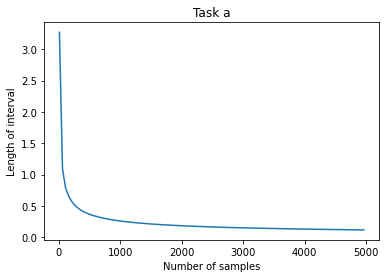

In [14]:
ns = np.arange(10, 5000, 50)
y_a = [calc_len_a(n, s_gamma, s_variance) for n in ns] 
plt.plot(ns, y_a)
plt.title("Task a")
plt.xlabel("Number of samples")
plt.ylabel("Length of interval")
plt.show()

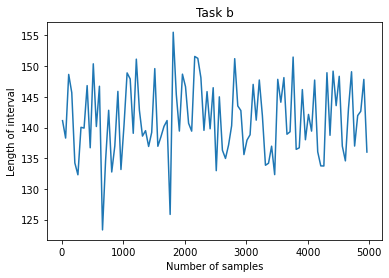

In [15]:
ns = np.arange(10, 5000, 50)
y_b = [calc_len_b(n, s_gamma, s_variance) for n in ns] 
plt.plot(ns, y_b)
plt.title("Task b")
plt.xlabel("Number of samples")
plt.ylabel("Length of interval")
plt.show()

Понятно, что первая оценка лучше второй, так как у нее меньше длина интервала. Еще в пользу первого случая говорит то, что длина интервала еще и убывает с ростом $n$. 